In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd

In [11]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [100]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [101]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

most_recent = session.query(Measurement).order_by(Measurement.date.desc()).limit(1)
    
for day in most_recent:
    most_recent_date = day.date

most_recent_date = dt.datetime.strptime(most_recent_date, "%Y-%m-%d")
most_recent_date

datetime.datetime(2017, 8, 23, 0, 0)

In [166]:
# Calculate the date 1 year ago from the last data point in the database
one_year_date = most_recent_date - dt.timedelta(days=366)
one_year_date

datetime.datetime(2016, 8, 22, 0, 0)

In [169]:
# Perform a query to retrieve the data and precipitation scores
rain_info = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_date).order_by(Measurement.date).all()
rain_info

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [193]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rain_info_df = pd.DataFrame(rain_info).dropna()
rain_info_df.set_index('date', inplace=True)
rain_info_df.head()


,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [194]:
# Sort the dataframe by date
rain_info_df = rain_info_df.sort_values(by=['date'])
rain_info_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text xticklabel objects>)

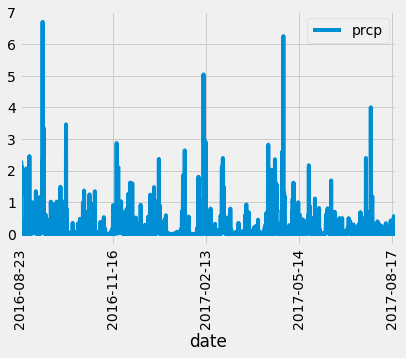

In [198]:
# # Use Pandas Plotting with Matplotlib to plot the data
# plt.plot(rain_info_df['date'], rain_info_df['prcp'])
# #plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="edge")
# plt.xlabel('Date')
# plt.ylabel('Rain (in.)')
# plt.xticks(rain_info_df["date"], rotation="vertical")
# plt.legend()
# plt.grid = True

# plt.tight_layout()
# plt.show()

rain_info_df.plot()
plt.xticks(rotation="vertical")

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_info_df.describe()


In [31]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Measurement.station).distinct().count()
total_stations

9

In [127]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations=session.query(Measurement.station, func.count(Measurement.station).label('count')).\
                                  group_by(Measurement.station).\
                                  order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [132]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
top_station = session.query(Measurement.station, 
                                    func.count(Measurement.station).label('count')).\
                                    group_by(Measurement.station).\
                                    order_by(func.count(Measurement.station).desc()).limit(1)[0][0]
                                    
station_stats = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
                
session.query(*station_stats).filter(Measurement.station==top_station).all()

[(54.0, 85.0, 71.66378066378067)]

In [149]:
# Choose the station with the highest number of temperature observations.
most_observations = session.query(Measurement.tobs).\
                                filter(Measurement.station==top_station).\
                                filter(Measurement.date >= one_year_date).\
                                order_by(Measurement.date.desc()).all()
most_observations


[(79.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (83.0),
 (82.0),
 (77.0),
 (76.0),
 (81.0),
 (82.0),
 (81.0),
 (76.0),
 (75.0),
 (77.0),
 (75.0),
 (82.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (76.0),
 (76.0),
 (80.0),
 (80.0),
 (76.0),
 (74.0),
 (74.0),
 (72.0),
 (69.0),
 (78.0),
 (78.0),
 (75.0),
 (74.0),
 (77.0),
 (78.0),
 (76.0),
 (81.0),
 (79.0),
 (76.0),
 (76.0),
 (77.0),
 (76.0),
 (73.0),
 (71.0),
 (77.0),
 (72.0),
 (72.0),
 (74.0),
 (72.0),
 (72.0),
 (75.0),
 (79.0),
 (73.0),
 (75.0),
 (74.0),
 (76.0),
 (74.0),
 (74.0),
 (74.0),
 (72.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (77.0),
 (76.0),
 (76.0),
 (80.0),
 (75.0),
 (72.0),
 (74.0),
 (80.0),
 (74.0),
 (74.0),
 (74.0),
 (74.0),
 (71.0),
 (71.0),
 (74.0),
 (76.0),
 (68.0),
 (69.0),
 (74.0),
 (74.0),
 (74.0),
 (77.0),
 (76.0),
 (75.0),
 (70.0),
 (74.0),
 (67.0),
 (70.0),
 (75.0),
 (79.0),
 (70.0),
 (75.0),
 (70.0),
 (75.0),
 (65.0),
 (60.0),
 (72.0),
 (67.0),
 (70.0),
 (74.0),
 (72.0),
 (68.0),
 (76.0),
 (72.0),
 (69.0),
 

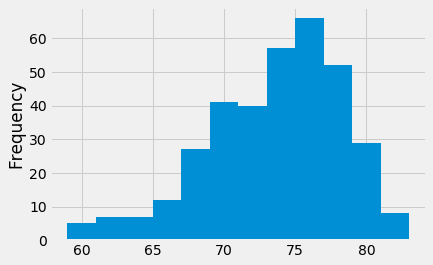

In [168]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
x = [x[0] for x in most_observations]

plt.hist(x, bins=12)
plt.ylabel('Frequency')
plt.show()


In [154]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [155]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
vacation_temps = calc_temps('2017-05-15', '2017-05-22')
vacation_temps

[(68.0, 74.57777777777778, 80.0)]

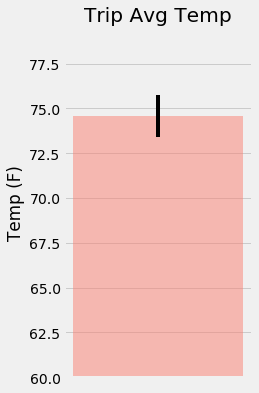

In [157]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
lower = vacation_temps[0][1] - vacation_temps[0][0]
upper = vacation_temps[0][2] - vacation_temps[0][1]

plt.figure(figsize=(3,6))
plt.bar(0, vacation_temps[0][1], yerr=[upper-lower], color='salmon', alpha=0.5)
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.ylim(60)

plt.show()

In [161]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def rainfall(start_date, end_date):
    return session.query(Measurement.station, 
                         Measurement.prcp.label('rainfall'),
                         Station.latitude,
                         Station.longitude,
                         Station.elevation).\
                            group_by(Measurement.station).\
                            join(Station, Measurement.station == Station.station).\
                            filter(Measurement.date >= start_date).\
                            filter(Measurement.date <= end_date).\
                            order_by(Measurement.prcp.desc()).all()

rainfall('2017-05-15', '2017-05-22')


[('USC00516128', 0.6, 21.3331, -157.8025, 152.4),
 ('USC00519281', 0.09, 21.45167, -157.84888999999998, 32.9),
 ('USC00513117', 0.08, 21.4234, -157.8015, 14.6),
 ('USC00519523', 0.06, 21.33556, -157.71139, 19.5),
 ('USC00519397', 0.05, 21.2716, -157.8168, 3.0),
 ('USC00514830', None, 21.5213, -157.8374, 7.0)]

## Optional Challenge Assignment

In [162]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [163]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [164]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [165]:
# Plot the daily normals as an area plot with `stacked=False`
